In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE

width = 28
nskip = 35

mnist = fetch_openml("mnist_784", version=1)

In [15]:
import matplotlib.pyplot as plt

In [17]:
mnist_img = mnist["data"].iloc[::nskip, :]
mnist_label = mnist["target"][::nskip]
mnist_int = np.asarray(mnist_label, dtype=int)
x_embedded = TSNE(n_components=2).fit_transform(mnist_img)

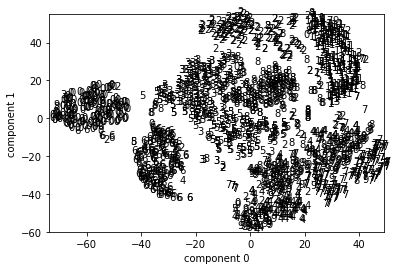

In [18]:
plt.xlim(x_embedded[:, 0].min(), x_embedded[:, 0].max())
plt.ylim(x_embedded[:, 1].min(), x_embedded[:, 1].max())
for x, label in zip(x_embedded, mnist_label):
    plt.text(x[0], x[1], label)
plt.xlabel("component 0")
plt.ylabel("component 1")
plt.show()

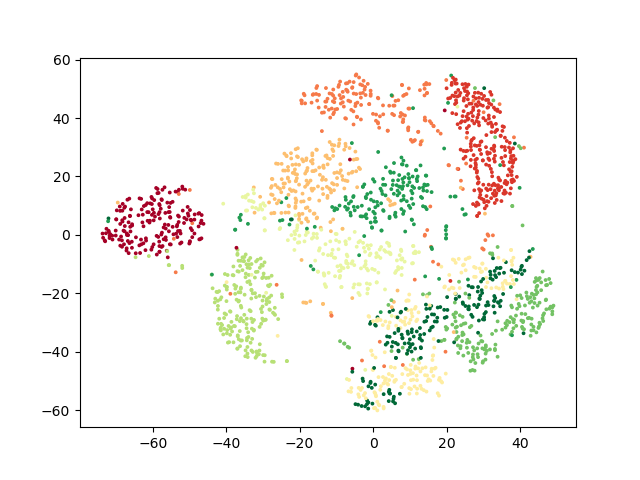

In [21]:
%matplotlib widget
fig, ax = plt.subplots()
cmap = plt.cm.RdYlGn

sc = plt.scatter(x_embedded[:, 0], x_embedded[:, 1], c=mnist_int/10.0, cmap=cmap, s=3)
annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                bbox=dict(boxstyle="round", fc="w"),
                arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)
def update_annot(ind):
    i = ind["ind"][0]
    pos = sc.get_offsets()[i]
    annot.xy = pos
    text = mnist_label[i]
    annot.set_text(text)
    annot.get_bbox_patch().set_facecolor(cmap(int(text)/10))

def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()

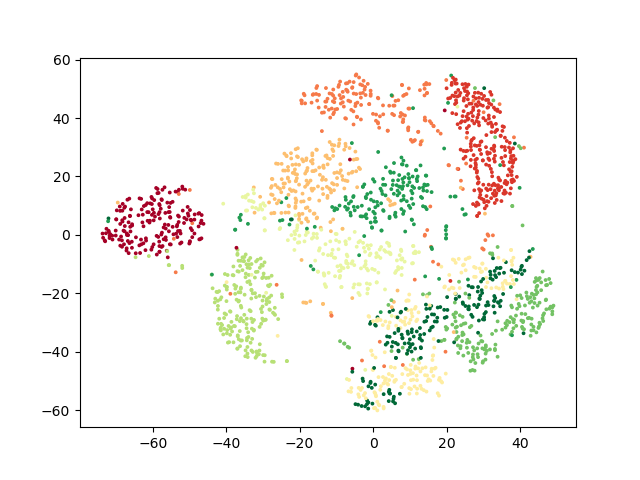

In [24]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

fig, ax = plt.subplots()
cmap = plt.cm.RdYlGn
img = np.array(mnist_img.iloc[0, :]).reshape((width, width))
imagebox = OffsetImage(img, zoom=1.0)
imagebox.image.axes = ax

annot = AnnotationBbox(imagebox, xy=(0,0), xybox=(width,width),
                        xycoords="data", boxcoords="offset points", pad=0.5,
                        arrowprops=dict( arrowstyle="->", connectionstyle="arc3,rad=-0.3"))
annot.set_visible(False)
ax.add_artist(annot)

sc = plt.scatter(x_embedded[:, 0], x_embedded[:, 1], c=mnist_int/10.0, cmap=cmap, s=3)

def update_annot(ind):
    i = ind["ind"][0]
    pos = sc.get_offsets()[i]
    annot.xy = (pos[0], pos[1])
    img = mnist_img[i, :].reshape((width, width))
    imagebox.set_data(img)

def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()

(192,)
(480, 640, 4)


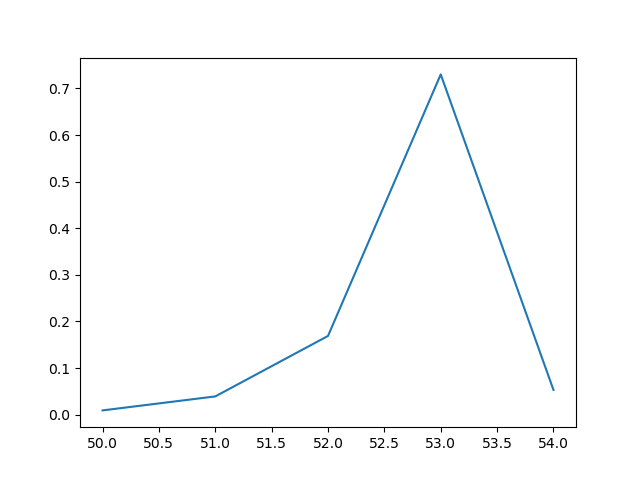

In [15]:
%matplotlib widget
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import io
pred_depth_path = "/media/jianyu/dataset/eval/cost_vol_visual/03_19_2022_23_03_37_/pred_depth_abs_err_cmap"
pred_cv_path = "/media/jianyu/dataset/eval/cost_vol_visual/03_19_2022_23_03_37_/cost_vol_pcd"

prefix = "0-300002-1"
test = Image.open(os.path.join(pred_depth_path, prefix + '.png'))
depth_image = plt.imread(os.path.join(pred_depth_path, prefix + '.png'))
cv_np = np.load(os.path.join(pred_cv_path, prefix + '-data.npy'))
#fig, ax = plt.subplots()
#ax.imshow(depth_image)
mask = cv_np[:,200,300] > 1e-4
print(mask.shape)
x = np.array(list(range(192)))[mask]
plt.plot(x,cv_np[:,200,300][mask])
img_buf = io.BytesIO()
plt.savefig(img_buf, format='png')

im = Image.open(img_buf)
print(np.array(im).shape)
im.show(title="My Image")

#fig, ax = plt.subplots()
#ax.imshow(fig1)

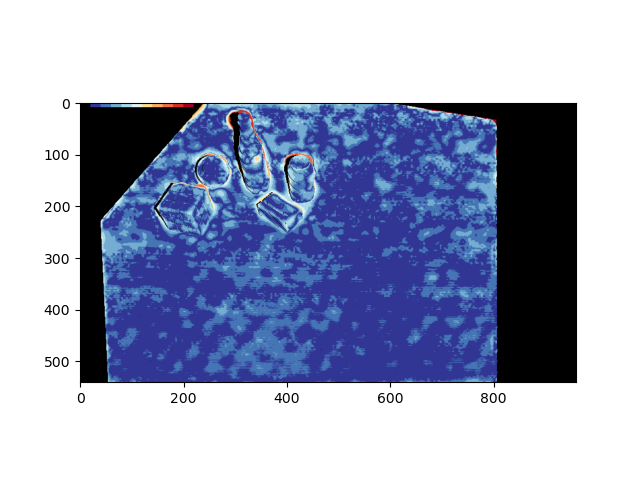

In [1]:
%matplotlib widget
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import io
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

pred_depth_path = "/media/jianyu/dataset/eval/cost_vol_visual/03_19_2022_23_03_37_/pred_depth_abs_err_cmap"
pred_cv_path = "/media/jianyu/dataset/eval/cost_vol_visual/03_19_2022_23_03_37_/cost_vol_pcd"
prefix = "0-300002-0"
width = 480
height = 640

fig, ax = plt.subplots()

depth_image = plt.imread(os.path.join(pred_depth_path, prefix + '.png'))
cv_np = np.load(os.path.join(pred_cv_path, prefix + '-data.npy'))
#fig, ax = plt.subplots()
sc = ax.imshow(depth_image)
mask = cv_np[:,200,300] > 1e-4
x = np.array(list(range(192)))[mask]
plt.plot(x,cv_np[:,200,300][mask])
img_buf = io.BytesIO()
plt.savefig(img_buf, format='png')

img = np.array(Image.open(img_buf))

imagebox = OffsetImage(img, zoom=1.0)
imagebox.image.axes = ax

annot = AnnotationBbox(imagebox, xy=(0,0), xybox=(width,height),
                        xycoords="data", boxcoords="offset points", pad=0.5,
                        arrowprops=dict( arrowstyle="->", connectionstyle="arc3,rad=-0.3"))
annot.set_visible(False)
ax.add_artist(annot)


#sc plt.scatter(x_embedded[:, 0], x_embedded[:, 1], c=mnist_int/10.0, cmap=cmap, s=3)

def update_annot(ind):
    i = ind["ind"][0]
    pos = depth_image.get_offsets()[i]
    annot.xy = (pos[0], pos[1])
    img = mnist_img[i, :].reshape((width, height))
    imagebox.set_data(img)

def hover(event):
    #vis = annot.get_visible()
    if event.inaxes == ax:
        output = sc.get_cursor_data(event)
        print(output)
        #if cont:
        #    update_annot(ind)
        #    annot.set_visible(True)
        #    fig.canvas.draw_idle()
        #else:
        #    if vis:
        #        annot.set_visible(False)
        #        fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()






In [2]:
import plotly.express as px
import pandas as pd
from PIL import Image


In [7]:
#df = px.data.gapminder().query("country=='Canada'")
mask = cv_np[:,200,300] > 1e-4
x = np.array(list(range(192)))[mask]
y = cv_np[:,200,300][mask]

z = {"x":x, "y":y}
f = pd.DataFrame(z)
print(x.shape, y.shape, f.shape)
fig = px.line(f, x="x", y="y",title='Life expectancy in Canada')
fig.add_scatter(x=[38],y=[0])
fig.show()
img_buf = io.BytesIO()
fig.write_image(img_buf)
img = np.array(Image.open(img_buf))
print(np.sum(img!=255))

(6,) (6,) (6, 2)


497184
